<a href="https://colab.research.google.com/github/hiraeth31/ML-labs/blob/main/%D0%94%D0%97_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install pandas seaborn scikit-learn

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Убираем NaN

In [71]:
print("Было пропусков в Sleep Disorder:", df['Sleep Disorder'].isnull().sum())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('unknown')
print("Стало пропусков:", df['Sleep Disorder'].isnull().sum())

Было пропусков в Sleep Disorder: 219
Стало пропусков: 0


# Преобразуем переменные

In [72]:
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
df['Blood Pressure'] = df['Blood Pressure'].astype('category')
'Sleep Duration' in df.columns

True

# Выбираем x и y

In [73]:
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y
y = df['Sleep Duration']
X = df.drop('Sleep Duration', axis=1) if 'Sleep Duration' in df.columns else df

X.head(n=3)

,Person ID,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,unknown
1,2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,unknown
2,3,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,unknown


In [74]:
y.head(n=3)

,Sleep Duration
0,6.1
1,6.2
2,6.2


# Кодирование категориальных признаков

In [75]:
from sklearn.preprocessing import OneHotEncoder


X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

gender_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False)
bmi_encoder = OneHotEncoder(sparse_output=False)
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)


gender_encoded = gender_encoder.fit_transform(X[["Gender"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])
sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])


gender_encoder.categories_
occupation_encoder.categories_
bmi_encoder.categories_
sleep_disorder_encoder.categories_


[array(['Insomnia', 'Sleep Apnea', 'unknown'], dtype=object)]

In [76]:
gender_encoder.get_feature_names_out()

occupation_encoder.get_feature_names_out()

bmi_encoder.get_feature_names_out()

sleep_disorder_encoder.get_feature_names_out()

array(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Sleep Disorder_unknown'], dtype=object)

# Предсказываем результат

In [77]:
# DataFrame для каждого закодированного признака
gender_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(["Gender"]))
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_encoder.get_feature_names_out(["Occupation"]))
bmi_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI Category"]))
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_encoder.get_feature_names_out(["Sleep Disorder"]))

# Удаляем исходные категориальные столбцы из X
# X = X.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)

# Соединяем
# X = pd.concat([X, gender_df, occupation_df, bmi_df, sleep_disorder_df], axis=1)

# Удаляем исходные категориальные столбцы из X и сохраняем в X_without_categorical
X_without_categorical = X.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)

# Определяем числовые признаки для масштабирования
numeric_features = ['Person ID', 'Age', 'Quality of Sleep', 'Physical Activity Level',
                   'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

from sklearn.preprocessing import StandardScaler
# Масштабируем только числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_categorical[numeric_features])
X_numeric_df = pd.DataFrame(X_scaled, columns=[f"{col}_scaled" for col in numeric_features])

# Соединяем масштабированные числовые признаки с закодированными категориальными
X = pd.concat([X_numeric_df, gender_df, occupation_df, bmi_df, sleep_disorder_df], axis=1)

X.head()

,Person ID_scaled,Age_scaled,Quality of Sleep_scaled,Physical Activity Level_scaled,Stress Level_scaled,Heart Rate_scaled,Daily Steps_scaled,Systolic_BP_scaled,Diastolic_BP_scaled,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unknown
0,-1.727426,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Модель 1.

Использовать все признаки (кроме y).
Обучить на всей выборке (без разделения).
Сделать предсказания на этой же выборке.
Вывести метрики и интерпретировать.
Построить график коэффициентов (model.coef_ vs X_scaled.columns) и интерпретировать.

In [78]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
model1.fit(X, y)

LinearRegression()

In [79]:
y_pred = model1.predict(X) # предсказываем результат
y_pred

array([6.52214119, 5.9650027 , 5.95913822, 5.90293224, 5.89706776,
       5.24926064, 5.64829344, 7.43997485, 7.43411037, 7.42824588,
       6.4128299 , 7.41651691, 6.40110093, 6.39523644, 6.38937196,
       6.38350748, 6.13911648, 6.3981935 , 6.16511502, 7.47009294,
       7.46422846, 7.45836397, 7.45249949, 7.44663501, 7.44077052,
       7.43490604, 7.42904155, 7.42317707, 7.41731258, 7.4114481 ,
       6.12715062, 6.15901365, 7.27371481, 6.32997614, 7.48261758,
       6.31824717, 6.31238268, 7.46502413, 7.45915964, 7.45329516,
       7.44743067, 7.44156619, 7.4357017 , 7.42983722, 7.42397274,
       7.41810825, 7.41224377, 7.40637928, 7.4005148 , 7.42106531,
       7.91908198, 7.91321749, 6.31904284, 7.47168428, 6.30731387,
       6.30144938, 7.45409083, 6.28972041, 6.28385593, 7.43649737,
       6.27212696, 6.26626247, 6.26039799, 6.25453351, 6.24866902,
       6.24280454, 6.32460433, 6.39570998, 6.47744953, 6.47158505,
       6.31397402, 6.30810954, 6.30224505, 6.29638057, 6.29051

# Анализируем результаты

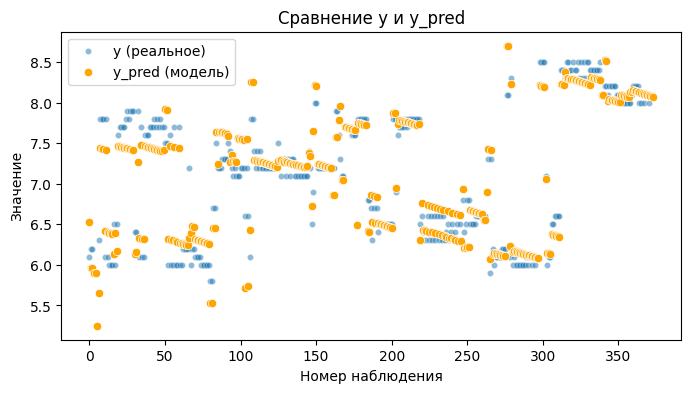

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

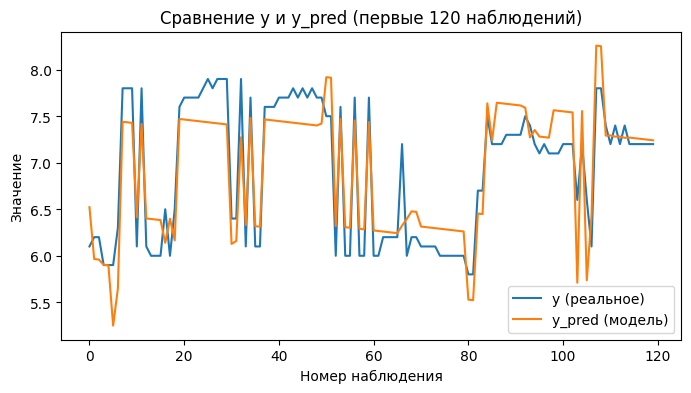

In [81]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()

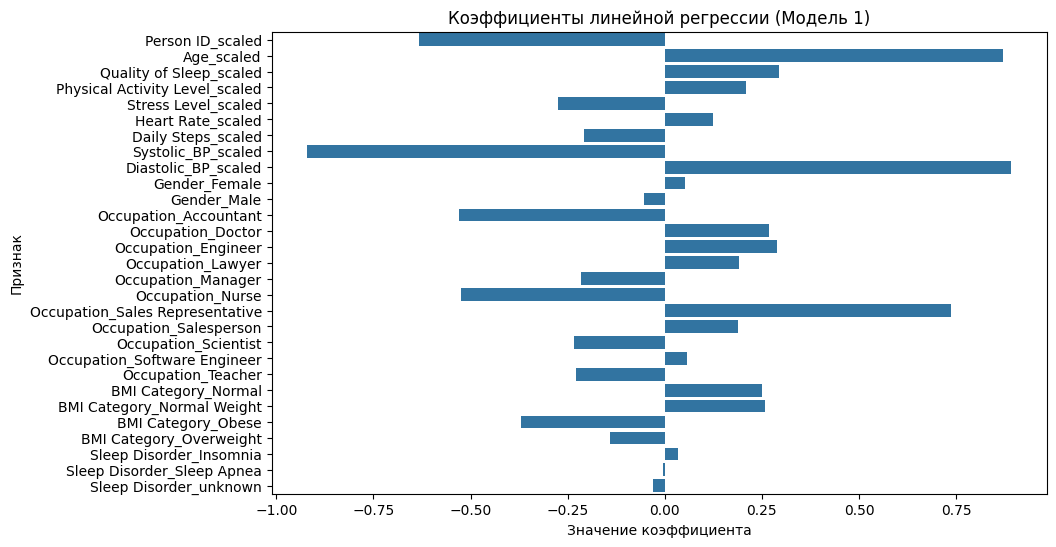

In [82]:
# Построение графика коэффициентов
plt.figure(figsize=(10, 6))
sns.barplot(x=model1.coef_, y=X.columns)
plt.xlabel("Значение коэффициента")
plt.ylabel("Признак")
plt.title("Коэффициенты линейной регрессии (Модель 1)")
plt.show()

# Метрики качества

In [83]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

y_pred = model1.predict(X)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.170
MAPE=0.024, MAPE_as_percent=2.411%
R2=0.917
MSE=0.053
RMSE=0.229


MAE (Mean Absolute Error)

В среднем ошибаемся в 0.17 единиц. Значение близко к нулю, так что нормально.

MAPE (Mean Absolute Percentage Error)

Средняя ошибка: 2.411% все у нас отлично (<10%).

MSE (Mean Squared Error)

Средний квадрат ошибки 0.053, очень даже хорошо, близко к нулю.

RMSE (Root Mean Squared Error)

У нас 0.229, близко к нулю - хорошо.

Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.

R² (Коэффициент детерминации)

Значение 0.917 близко к 1, так что модель предсказывает почти идеально.

# Модель 2.

Использовать все признаки.
Сделать train_test_split.
Обучить на X_train, предсказать на X_train и X_test.
Вывести метрики для обучающей и тестовой выборки, интерпретировать.
Визуализировать коэффициенты и интерпретировать.

In [84]:
from sklearn.model_selection import train_test_split

# Используем уже обработанные данные из Модели 1
X_2 = X
y_2 = y
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X.head()

,Person ID_scaled,Age_scaled,Quality of Sleep_scaled,Physical Activity Level_scaled,Stress Level_scaled,Heart Rate_scaled,Daily Steps_scaled,Systolic_BP_scaled,Diastolic_BP_scaled,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unknown
0,-1.727426,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [85]:
model2 = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
model2.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model2.predict(X) # предсказываем результат
y_pred

array([6.38923351, 6.0582103 , 6.05273838, 5.90547192, 5.9       ,
       4.81171941, 5.48503806, 7.42124622, 7.41577429, 7.41030237,
       6.39196231, 7.39935852, 6.38101846, 6.37554654, 6.37007461,
       6.36460269, 6.15290111, 6.35502056, 6.20903145, 7.45300683,
       7.44753491, 7.44206298, 7.43659106, 7.43111913, 7.42564721,
       7.42017528, 7.41470336, 7.40923143, 7.40375951, 7.39828759,
       6.11903705, 6.18063932, 7.29810687, 6.3781616 , 7.46835167,
       6.36721775, 6.36174582, 7.4519359 , 7.44646397, 7.44099205,
       7.43552012, 7.4300482 , 7.42457627, 7.41910435, 7.41363243,
       7.4081605 , 7.40268858, 7.39721665, 7.39174473, 7.38763452,
       7.91343473, 7.9079628 , 6.37161874, 7.46180881, 6.36067489,
       6.35520296, 7.44539304, 6.34425911, 6.33878719, 7.42897727,
       6.32784334, 6.32237141, 6.31689949, 6.31142756, 6.30595564,
       6.30048371, 6.44492403, 6.45539949, 6.48009712, 6.4746252 ,
       6.3705478 , 6.36507588, 6.35960395, 6.35413203, 6.34866

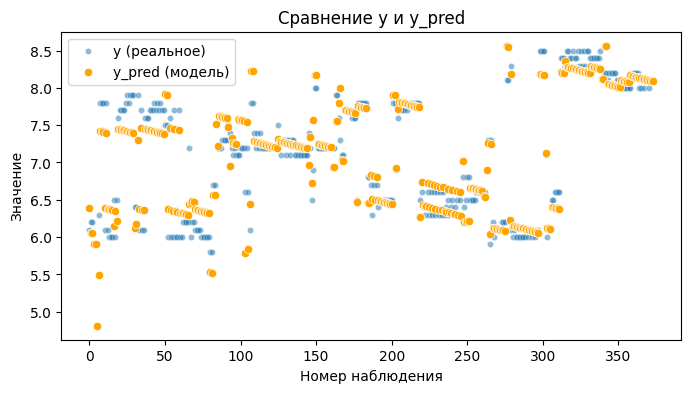

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

### Метрики на данных, которые модель знает

In [88]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

calculate_metrics(y_train, y_train_pred)

MAE 0.166
MAPE=0.023, MAPE_as_percent=2.346%
R2=0.916
MSE=0.052
RMSE=0.228


### Метрики на данных, которые модель не знает

In [89]:
calculate_metrics(y_test, y_test_pred)

MAE 0.195
MAPE=0.028, MAPE_as_percent=2.838%
R2=0.899
MSE=0.068
RMSE=0.260


### Коэффиценты

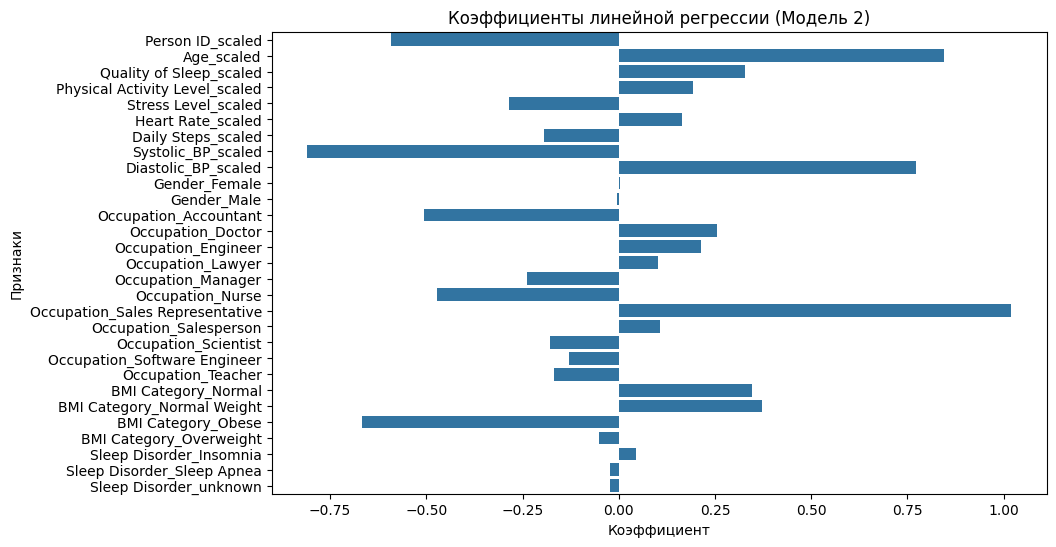

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x=model2.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии (Модель 2)")
plt.show()

Модель 3.

Использовать только best_features (отобранные признаки).
Обучить на всей выборке.
Предсказать на всей выборке.
Вывести метрики качества и интерпретировать.
Визуализировать коэффициенты и интерпретировать.

In [91]:
categorical_features = ['Sleep Disorder', 'Occupation', 'BMI Category', 'Blood Pressure']
numeric_features = ['Quality of Sleep','Stress Level']
best_features = categorical_features + numeric_features

X = df[best_features]
y = df['Sleep Duration']

X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

# Теперь только 3 числовых признака
numeric_features = ['Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Quality of Sleep']

# Простое кодирование как в первой модели
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False)
bmi_encoder = OneHotEncoder(sparse_output=False)

sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])

# Создаем DataFrame
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_encoder.get_feature_names_out(["Sleep Disorder"]))
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_encoder.get_feature_names_out(["Occupation"]))
bmi_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI Category"]))

# Удаляем категориальные столбцы
X_without_categorical = X.drop(['Sleep Disorder', 'Occupation', 'BMI Category'], axis=1)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_without_categorical)
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

# Соединяем всё
X = pd.concat([X_numeric_df, sleep_disorder_df, occupation_df, bmi_df], axis=1)

X.head()

/tmp/ipython-input-974874693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
/tmp/ipython-input-974874693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)


,Stress Level,Systolic_BP,Diastolic_BP,Quality of Sleep,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unknown,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,-1.098280,0.347021,-0.330002,-0.268102,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.098280,1.475592,-0.459239,-0.755640,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.098280,1.475592,-0.459239,-0.755640,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-2.771424,1.475592,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-2.771424,1.475592,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
model3 = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
model3.fit(X, y)

LinearRegression()

### Метрики

In [93]:
y_best_pred = model3.predict(X)
MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.172
MAPE=0.024, MAPE_as_percent=2.444%
R2=0.913
MSE=0.055
RMSE=0.235


# Коэффиценты

In [94]:
model3.coef_

array([ 0.48041245, -0.25136297, -0.60386026,  0.53831785,  0.03142239,
        0.05370562, -0.08512801, -0.49508602,  0.26350109,  0.33557907,
        0.12128765, -0.12609224, -0.13779349,  0.47065515,  0.08040451,
        0.03696244, -0.11050366, -0.4389145 , -0.1191029 ,  0.00314007,
        0.24117303, -0.12521021])

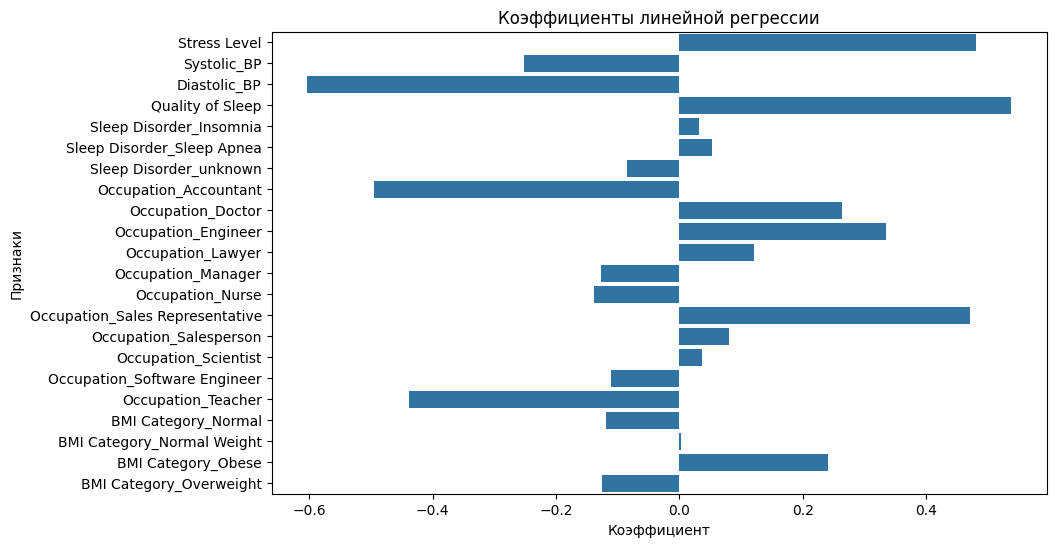

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

Модель 4.

Использовать best_features.
Сделать train_test_split.
Обучить на X_train, предсказать на X_train и X_test.
Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
Визуализировать коэффициенты и интерпретировать.

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест
len(X_train), len(X_test), len(y_train), len(y_test)

(299, 75, 299, 75)

In [97]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

### Метрики на данных, которые модель знает

In [104]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

calculate_metrics(y_train, y_train_pred)

MAE 0.210
MAPE=0.030, MAPE_as_percent=2.987%
R2=0.880
MSE=0.074
RMSE=0.273


### Метрики на данных, которые модель не знает

In [105]:
calculate_metrics(y_test, y_test_pred)

MAE 0.210
MAPE=0.031, MAPE_as_percent=3.053%
R2=0.894
MSE=0.070
RMSE=0.265


### Коэффиценты

In [100]:
model4.coef_

array([ 0.5062911 , -0.22390528, -0.51352159,  0.45453941,  0.02021555,
        0.05663059, -0.07684614, -0.48346778,  0.2744384 ,  0.31395259,
        0.12017382, -0.12228636, -0.14791369,  0.61354979,  0.07152922,
        0.05087245, -0.28783998, -0.40300847, -0.09018999,  0.07370121,
        0.10070045, -0.08421167])

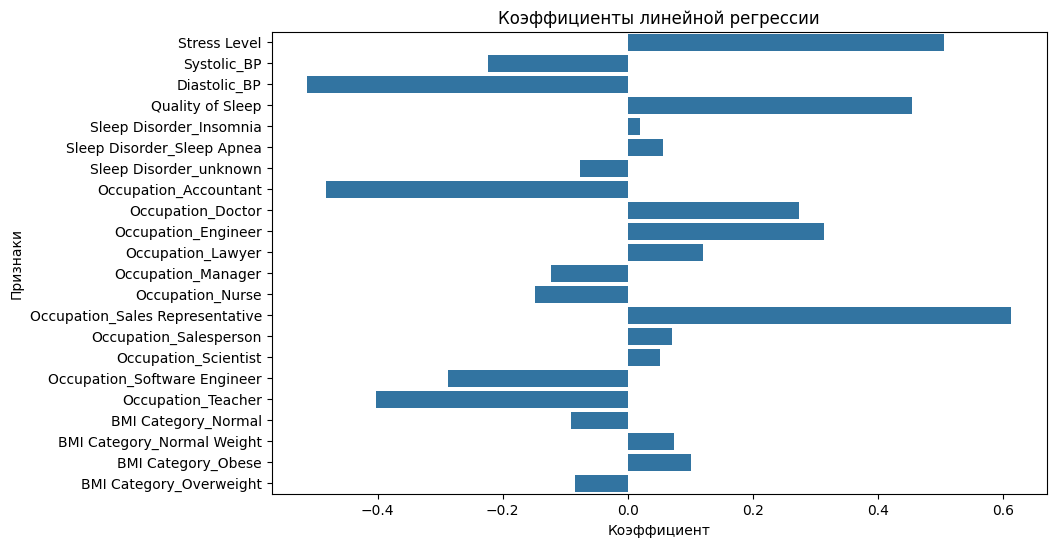

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()